In [1]:
using Plots
using LaTeXStrings
using Statistics

### 1. 511 keV

In [2]:
# Messwerte:
winkel_511 = [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,
    4.0, 4.5, 5.0] # Grad
rate_511 = [432, 476, 484, 585, 885, 707, 1007, 1646, 2147, 2559, 2462, 1946, 1383, 1075, 637, 533, 444, 494,
    503, 471, 456] # 1/60s

# Fehlerrechnung:
winkel_511_err = 0.5 # Grad
rate_511_err = sqrt.(rate_511)

# Normierung der Rate
rate_norm_511 = rate_511 .* 1/60 # 1/s
# Gaußsche Fehlerfortpflanzung
rate_norm_511_err = rate_511_err .* 1/60;

In [3]:
# Halbwertsbreite bestimmen:
halbeHöhe = 1/2 * maximum(rate_norm_511)
g(x) = halbeHöhe

# Gauß-fit (μ = Erwartungswert, σ = Standardabweichung):
gauß(x, μ, σ) = exp(- 1/2 * ((x-μ)/σ)^2)

testσ = 1.04
testμ = -0.34
testa = 35
testb = minimum(rate_norm_511) + 0.5
testGauß(x) = testa * gauß(x, testμ, testσ) + testb

# Halbwertsbreite:
x1 = sqrt(log(((halbeHöhe - testb) / testa)) * (-2)) * testσ + testμ
x2 = -sqrt(log(((halbeHöhe - testb) / testa)) * (-2)) * testσ + testμ
halbwertsbreite = x1 - x2
halbwertsbreite_ger = round(halbwertsbreite, digits=1)
;

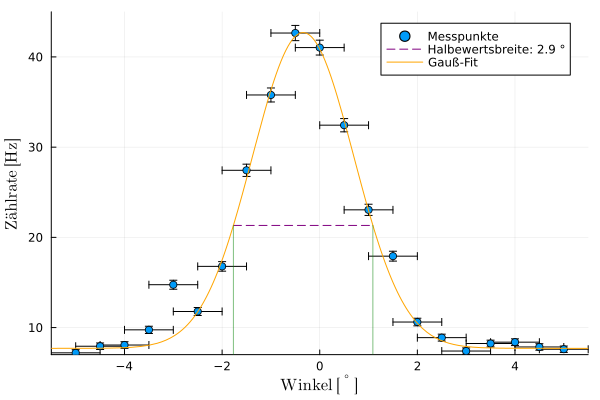

In [4]:
plot511 = scatter(winkel_511, rate_norm_511, xerr = winkel_511_err, yerr = rate_norm_511_err, markershape=:circ,
    label="Messpunkte", xaxis = [-5.5, 5.5], yaxis=[7,45])
plot!(g, [x2,x1], linestyle=:dash, linecolor=:purple, label = "Halbewertsbreite: $halbwertsbreite_ger °")
plot!(testGauß, label = "Gauß-Fit", linecolor=:orange)
plot!([x1, x1], [6, halbeHöhe], label = "", linecolor=:green, linealpha=0.5)
plot!([x2, x2], [6, halbeHöhe], label = "", linecolor=:green, linealpha=0.5)
xlabel!("Winkel [°]")
xlabel!(L"\mathrm{Winkel\ [^\circ]}")
ylabel!(L"\mathrm{Zählrate\ [Hz]}")

In [5]:
savefig(plot511, "../../media/B3.4/plot511.svg")
savefig(plot511, "../../media/B3.4/plot511.pdf");

### 2. 1275 keV

In [6]:
# Messwerte:
winkel_1275 = [-5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5,
    4.0, 4.5, 5.0]
rate_1275 = [22, 31, 28, 25, 32, 24, 17, 30, 27, 36, 22, 36, 27, 23, 26, 38, 18, 17,
    23, 34, 29]

# Fehlerrechnung:
winkel_1275_err = 0.5 # Grad
rate_1275_err = sqrt.(rate_1275)
;

# Normierung der Rate
rate_norm_1275 = rate_1275 .* 1/60 # 1/s
rate_norm_1275_err = rate_1275_err .* 1/60 # Gaußsche Fehlerfortpflanzung
;

In [7]:
mean(rate_norm_1275)

0.4484126984126984

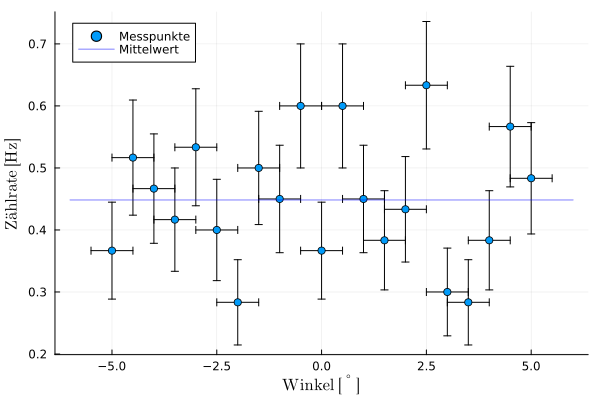

In [8]:
plot1275 = scatter(winkel_1275, rate_norm_1275, xerr = winkel_1275_err, yerr = rate_norm_1275_err, markershape=:circ,
    label="Messpunkte")
plot!([-6, 6], [mean(rate_norm_1275), mean(rate_norm_1275)], label = "Mittelwert", linecolor=:blue, linealpha=0.5)
xlabel!(L"\mathrm{Winkel\ [^\circ]}")
ylabel!(L"\mathrm{Zählrate\ [Hz]}")

In [9]:
savefig(plot1275, "../../media/B3.4/plot1275.svg")
savefig(plot1275, "../../media/B3.4/plot1275.pdf");